# Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Cleaning/Pre-processing

In [ ]:
df = pd.read_csv("/content/players_20.csv")

# extract players' names and cont. variables
df = df[['club', 'overall', 'potential', 'value_eur', 'wage_eur', 'international_reputation', 'weak_foot']]

# replace null values with mean
df = df.fillna(df.mean())

# selecting top 4, mid 4, and bottom 4 clubs
df_clubs = df[(df.club =='Manchester City') | (df.club =='Liverpool') | (df.club =='Chelsea') | (df.club == 'Tottenham Hotspur') |
              (df.club =='Leiceter City') | (df.club =='West Ham United') | (df.club =='Watford') | (df.club == 'Crystal Palace') |
              (df.club == 'Brighton & Hove Albion') |(df.club == 'Cardiff City') | (df.club == 'Fulham') | (df.club == 'Huddersfield Town')]

# categorizing by top 4, mid 4, and bottom 4
df_clubs.club = df_clubs.club.replace({'Manchester City':'top 4', 'Liverpool':'top 4', 'Chelsea':'top 4', 'Tottenham Hotspur':'top 4',
                                       'Leiceter City':'mid 4', 'West Ham United':'mid 4', 'Watford':'mid 4', 'Crystal Palace':'mid 4',
                                       'Brighton & Hove Albion':'bottom 4', 'Cardiff City':'bottom 4', 'Fulham':'bottom 4', 'Huddersfield Town':'bottom 4'})

df_clubs.club.value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


top 4       132
bottom 4    123
mid 4        99
Name: club, dtype: int64

# Train & Test Split

In [ ]:
# X - all features except the club , y - clubs
X = df_clubs.iloc[:, 1:].values
y = df_clubs.club.values

# 80/20 train & test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

# standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# scale both the train and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Apply Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# initialize the decision tree classifier
dtc = DecisionTreeClassifier()

# train the model
dtc.fit(X_train, y_train)

# get prediction
y_pred = dtc.predict(X_test)

# Model Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

print("-----------Confusion matrix-----------")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print("--------------------------------------")

print("Test set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("=======================================")

# 10 fold CV
acc = cross_val_score(dtc, X_test, y_test, cv=10)
print("\n10-fold CV accuracy for each fold\n {}".format(acc))
print("\n--------------------------------------")
print("10-fold CV Average Accuracy: {:.2f}".format(acc.mean()))

-----------Confusion matrix-----------
Predicted  bottom 4  mid 4  top 4  All
True                                  
bottom 4         18      4      0   22
mid 4             9     12      9   30
top 4             5      3     11   19
All              32     19     20   71
--------------------------------------
Test set accuracy: 0.58

10-fold CV accuracy for each fold
 [0.75       0.85714286 0.71428571 0.57142857 0.28571429 0.57142857
 0.85714286 0.85714286 0.42857143 0.42857143]

--------------------------------------
10-fold CV Average Accuracy: 0.63


# Apply GridSearchCV to optimize parameters

In [ ]:
df = pd.read_csv("/content/players_20.csv")

# extract players' names and some cont. variables
df = df[['club', 'overall', 'potential', 'value_eur', 'wage_eur', 'international_reputation', 'weak_foot','skill_moves']]

# replace null values with mean
df = df.fillna(df.mean())

# selecting top 4, mid 4, and bottom 4 clubs
df_clubs = df[(df.club =='Manchester City') | (df.club =='Liverpool') | (df.club =='Chelsea') | (df.club == 'Tottenham Hotspur') |
              (df.club =='Leiceter City') | (df.club =='West Ham United') | (df.club =='Watford') | (df.club == 'Crystal Palace') |
              (df.club == 'Brighton & Hove Albion') |(df.club == 'Cardiff City') | (df.club == 'Fulham') | (df.club == 'Huddersfield Town')]

# categorizing by top 4, mid 4, and bottom 4
df_clubs.club = df_clubs.club.replace({'Manchester City':'top 4', 'Liverpool':'top 4', 'Chelsea':'top 4', 'Tottenham Hotspur':'top 4',
                                       'Leiceter City':'mid 4', 'West Ham United':'mid 4', 'Watford':'mid 4', 'Crystal Palace':'mid 4',
                                       'Brighton & Hove Albion':'bottom 4', 'Cardiff City':'bottom 4', 'Fulham':'bottom 4', 'Huddersfield Town':'bottom 4'})

df_clubs.club.value_counts()

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


top 4       132
bottom 4    123
mid 4        99
Name: club, dtype: int64

In [ ]:
# X - all features except the club , y - clubs
X = df_clubs.iloc[:, 1:].values
y = df_clubs.club.values

# 80/20 train & test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 1)

# standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

# scale both the train and the test set
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# initialize the decision tree classifier
dtc = DecisionTreeClassifier()

# train the model
dtc.fit(X_train, y_train)

# get prediction
y_pred = dtc.predict(X_test)

Tune Parameters Using GridSearchCV

In [ ]:
from sklearn.model_selection import GridSearchCV

# initialize parameters
depths = np.arange(2,10)
splits = np.arange(2,10)
leaves = [1, 2, 3]
randomState = [0]

params = {"criterion": ("gini", "entropy"), "splitter" : ("best", "random"), 
          "max_depth" : depths, "min_samples_split": splits, "min_samples_leaf": leaves, "random_state" : randomState}

# apply gridsearchcv with 10 fold
gs_dtc = GridSearchCV(dtc, params, cv = 10)

# train the model
gs_dtc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ('gini', 'entropy'),
                  

In [ ]:
gs_dtc.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'min_samples_leaf': 3,
 'min_samples_split': 9,
 'random_state': 0,
 'splitter': 'best'}

In [ ]:
# initialize the best model
best_model = gs_dtc.best_estimator_

# train the model again with the optimal params
best_model.fit(X_train, y_train)

# get the prediction
y_pred = best_model.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

print("-----------Confusion matrix-----------")
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))
print("--------------------------------------")

print("\nTest set accuracy: {:.2f}".format(accuracy_score(y_test, y_pred)))
print("=======================================")

-----------Confusion matrix-----------
Predicted  bottom 4  mid 4  top 4  All
True                                  
bottom 4         19      2      1   22
mid 4            12     11      7   30
top 4             3      3     13   19
All              34     16     21   71
--------------------------------------

Test set accuracy: 0.61


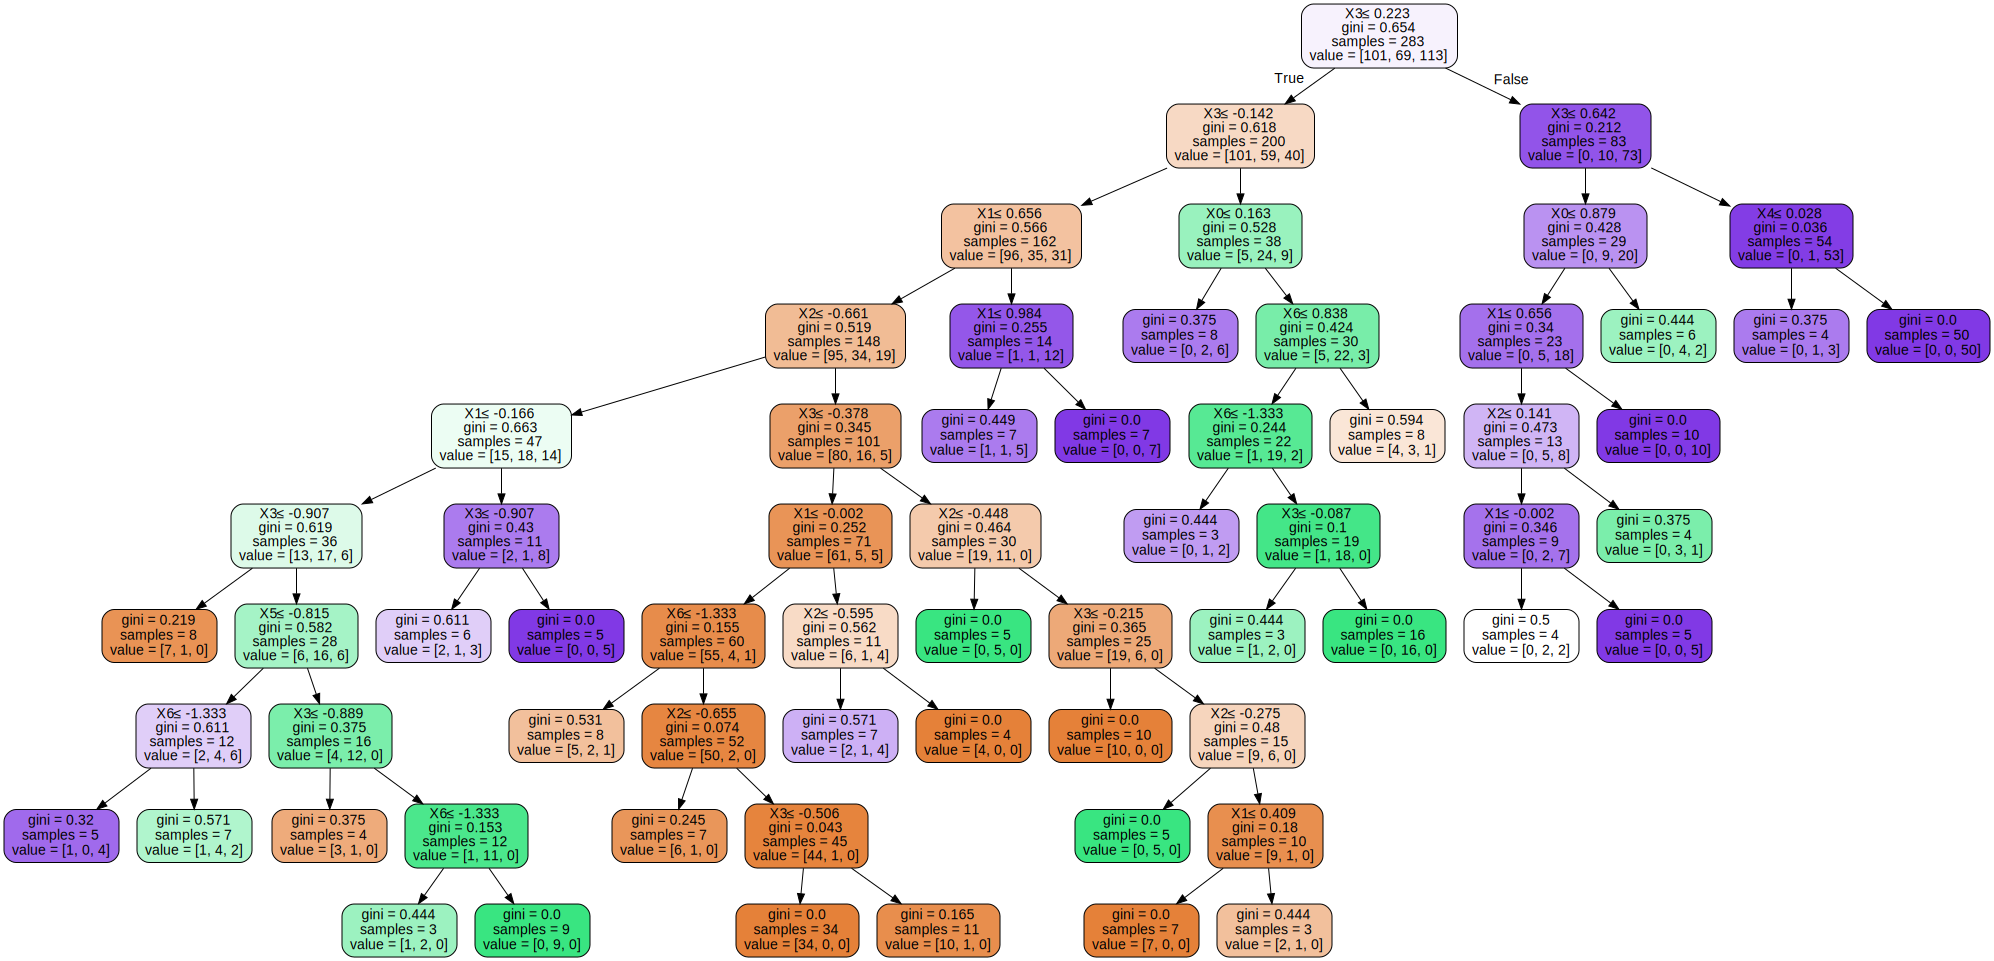

<Figure size 360x360 with 0 Axes>

In [ ]:
import graphviz
from sklearn import tree
from matplotlib.pyplot import figure

dot_data = tree.export_graphviz(best_model, out_file=None,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  

plt.figure(figsize=(5,5))

graph 

# df = df[['club', 'overall', 'potential', 'value_eur', 'wage_eur', 'international_reputation', 'weak_foot','skill_moves']]